In [1]:
import pandas as pd
import numpy as np, os
from random import seed
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
from plotnine import *
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression, LinearRegression
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix
rand_seed = 0
np.random.seed(rand_seed)
seed(rand_seed)

In [2]:
df = pd.read_csv('Caravan.csv', index_col = False)
del df['Unnamed: 0']
df.head(10)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,No
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,No
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No
5,23,1,2,1,5,0,5,0,5,0,...,0,0,0,0,0,0,0,0,0,No
6,39,2,3,2,9,2,2,0,5,7,...,0,0,0,0,0,0,0,0,0,No
7,33,1,2,3,8,0,7,0,2,7,...,0,0,0,0,0,0,0,0,0,No
8,33,1,2,4,8,0,1,3,6,6,...,0,0,0,0,0,0,0,0,0,No
9,11,2,3,3,3,3,5,0,2,7,...,0,0,0,1,0,0,0,0,0,No


In [3]:
#Check for nans in the dataset
df.columns[df.isna().sum()>0]
# Empty List => no nans

Index([], dtype='object')

In [4]:
# Split dataframe into X, y
def splitCaravanDataframe(df):
    y_df = pd.DataFrame(df['Purchase'])
    X_df = df.drop('Purchase', axis = 1)
    return X_df, y_df

X_df, y_df = splitCaravanDataframe(df)

In [5]:
# Count toal number of values in Purchase Column
y_df.value_counts()
# Dataset is highly imbalanced

Purchase
No          5474
Yes          348
dtype: int64

In [6]:
# Coverting 'Yes' to 1 and 'No' to 0
y_df['Purchase']  = y_df['Purchase'].map(dict({'Yes': 1, 'No': 0}))

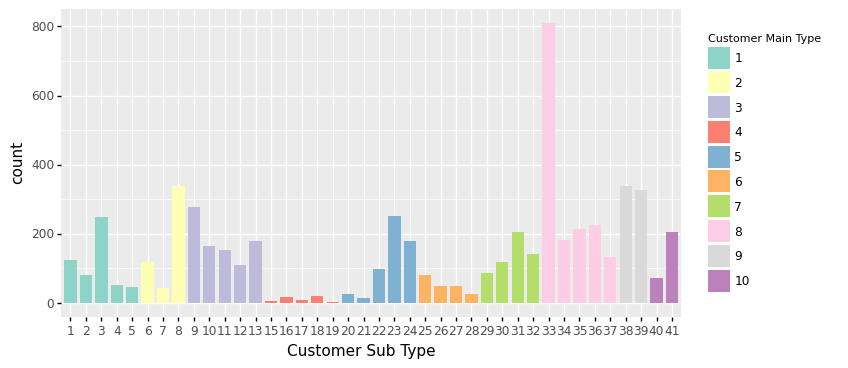

<ggplot: (273102559)>

In [7]:
# Relationship b/w customer main-type and sub-type
ggplot(df, aes(x = 'factor(MOSTYPE)', fill ='factor(MOSHOOFD)')) + geom_bar(width =0.8) \
 + xlab("Customer Sub Type") \
 + theme(legend_position = 'right', legend_title = element_text(size = 8), figure_size = (8, 4) ) \
 + scale_fill_brewer(type="qual", palette = "Set3", name = "Customer Main Type")

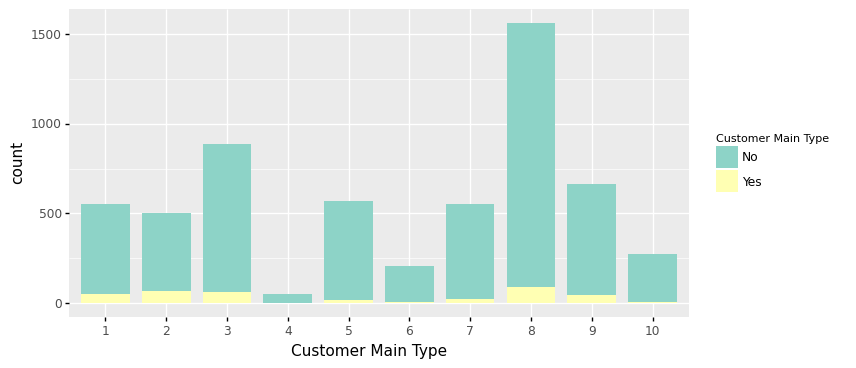

<ggplot: (297938152)>

In [8]:
ggplot(df, aes(x = 'factor(MOSHOOFD)', fill ='factor(Purchase)')) + geom_bar(width =0.8) \
 + xlab("Customer Main Type") \
 + theme(legend_position = 'right', legend_title = element_text(size = 8), figure_size = (8, 4) ) \
 + scale_fill_brewer(type="qual", palette = "Set3", name = "Customer Main Type")

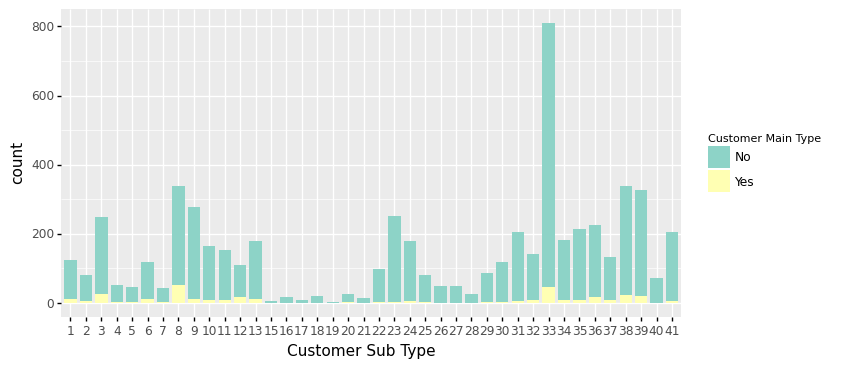

<ggplot: (291058625)>

In [9]:
ggplot(df, aes(x = 'factor(MOSTYPE)', fill ='factor(Purchase)')) + geom_bar(width =0.8) \
 + xlab("Customer Sub Type") \
 + theme(legend_position = 'right', legend_title = element_text(size = 8), figure_size = (8, 4) ) \
 + scale_fill_brewer(type="qual", palette = "Set3", name = "Customer Main Type")

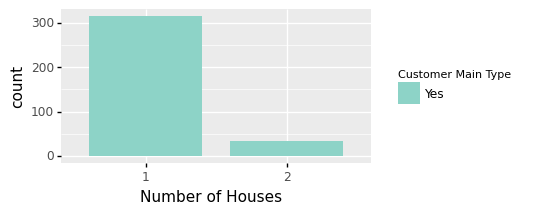

<ggplot: (291207400)>

In [10]:
ggplot(df.loc[df['Purchase'] == 'Yes'], aes(x = 'factor(MAANTHUI)', fill ='factor(Purchase)')) + geom_bar(width =0.8) \
 + xlab("Number of Houses") \
 + theme(legend_position = 'right', legend_title = element_text(size = 8), figure_size = (4, 2) ) \
 + scale_fill_brewer(type="qual", palette = "Set3", name = "Customer Main Type")

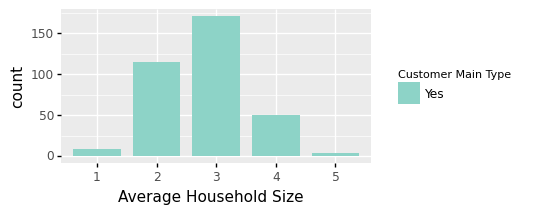

<ggplot: (298074094)>

In [11]:
ggplot(df.loc[df['Purchase'] == 'Yes'], aes(x = 'factor(MGEMOMV)', fill ='factor(Purchase)')) + geom_bar(width =0.8) \
 + xlab("Average Household Size") \
 + theme(legend_position = 'right', legend_title = element_text(size = 8), figure_size = (4, 2) ) \
 + scale_fill_brewer(type="qual", palette = "Set3", name = "Customer Main Type")

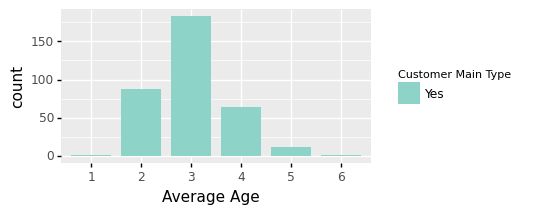

<ggplot: (298072622)>

In [12]:
ggplot(df.loc[df['Purchase'] == 'Yes'], aes(x = 'factor(MGEMLEEF)', fill ='factor(Purchase)')) + geom_bar(width =0.8) \
 + xlab("Average Age") \
 + theme(legend_position = 'right', legend_title = element_text(size = 8), figure_size = (4, 2) ) \
 + scale_fill_brewer(type="qual", palette = "Set3", name = "Customer Main Type")

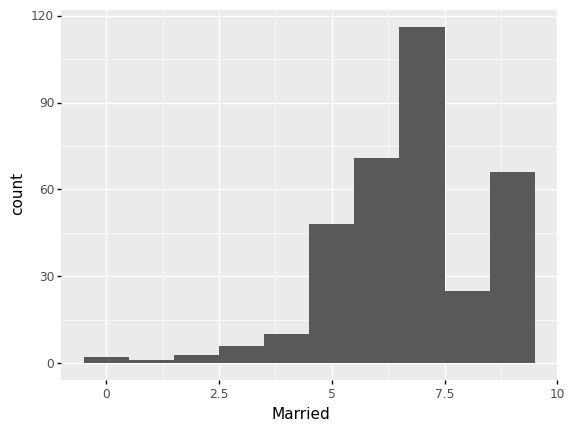

<ggplot: (297625049)>

In [13]:
ggplot(df.loc[df['Purchase'] == 'Yes'], aes(x='MRELGE')) + geom_histogram(binwidth = 1) + xlab('Married')

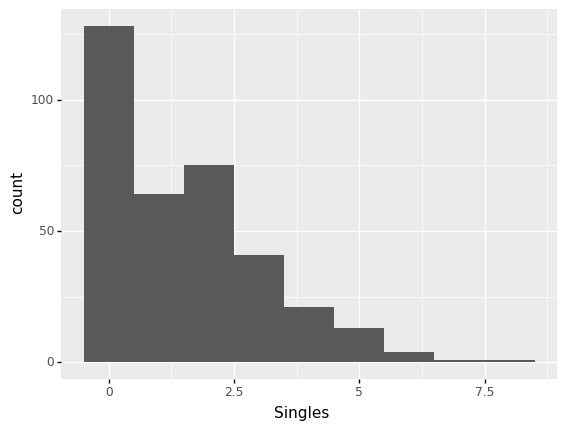

<ggplot: (298960523)>

In [14]:
ggplot(df.loc[df['Purchase'] == 'Yes'], aes(x='MFALLEEN')) + geom_histogram(binwidth = 1) + xlab('Singles')

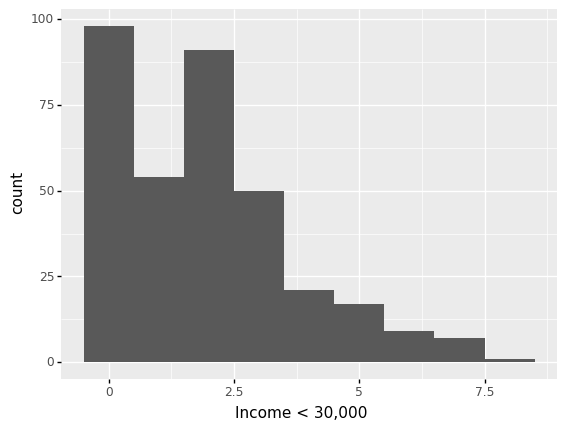

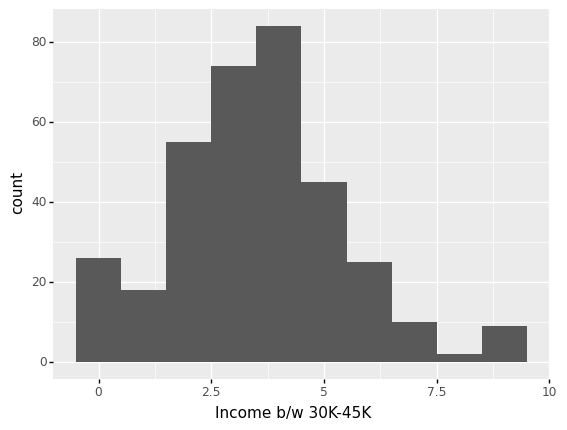

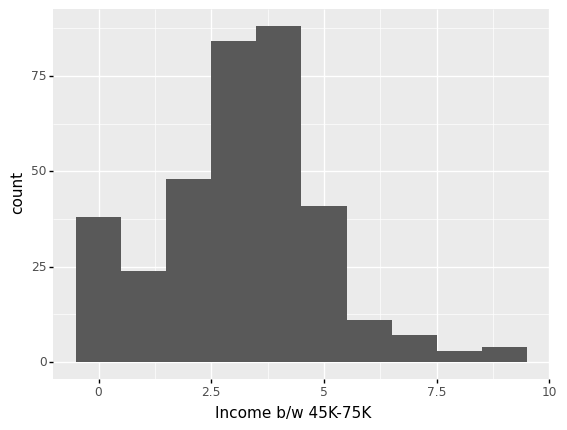

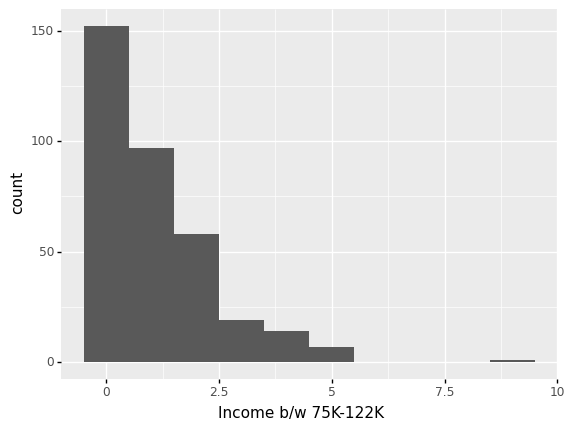

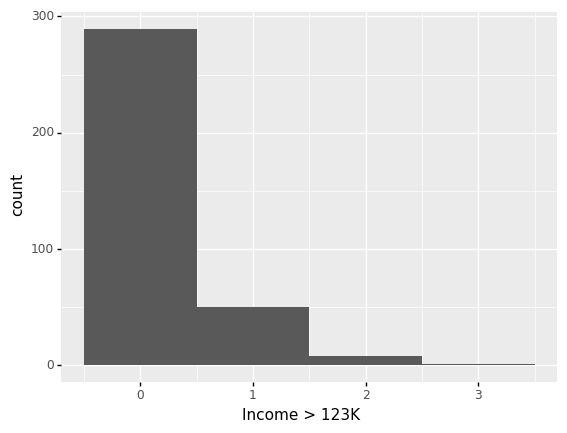

(<ggplot: (299118806)>,
 <ggplot: (299119601)>,
 <ggplot: (299116843)>,
 <ggplot: (299392787)>,
 <ggplot: (299123586)>)

In [15]:
(ggplot(df.loc[df['Purchase'] == 'Yes'], aes(x='MINKM30')) + geom_histogram(binwidth = 1) + xlab('Income < 30,000')), \
(ggplot(df.loc[df['Purchase'] == 'Yes'], aes(x='MINK3045')) + geom_histogram(binwidth = 1) + xlab('Income b/w 30K-45K')), \
(ggplot(df.loc[df['Purchase'] == 'Yes'], aes(x='MINK4575')) + geom_histogram(binwidth = 1) + xlab('Income b/w 45K-75K')), \
(ggplot(df.loc[df['Purchase'] == 'Yes'], aes(x='MINK7512')) + geom_histogram(binwidth = 1) + xlab('Income b/w 75K-122K')), \
(ggplot(df.loc[df['Purchase'] == 'Yes'], aes(x='MINK123M')) + geom_histogram(binwidth = 1) + xlab('Income > 123K'))

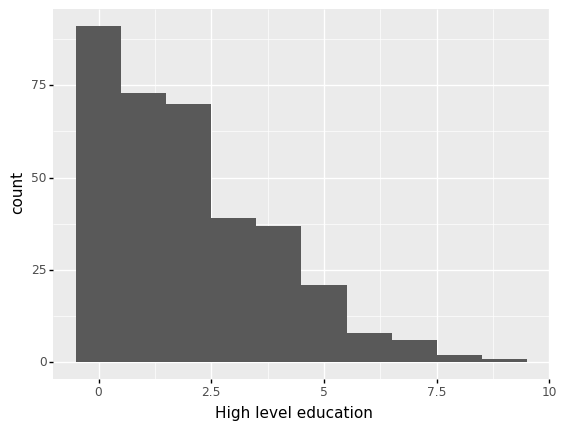

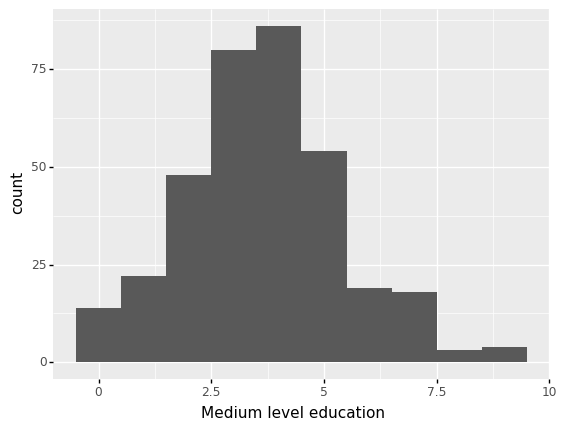

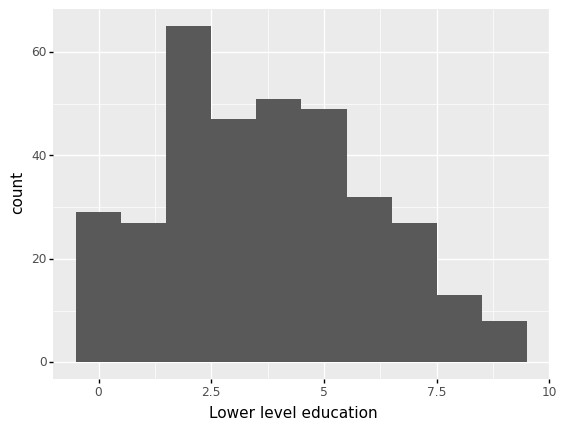

(<ggplot: (299911406)>, <ggplot: (299914487)>, <ggplot: (299918324)>)

In [16]:
(ggplot(df.loc[df['Purchase'] == 'Yes'], aes(x='MOPLHOOG')) + geom_histogram(binwidth = 1) + xlab('High level education')), \
(ggplot(df.loc[df['Purchase'] == 'Yes'], aes(x='MOPLMIDD')) + geom_histogram(binwidth = 1) + xlab('Medium level education')), \
(ggplot(df.loc[df['Purchase'] == 'Yes'], aes(x='MOPLLAAG')) + geom_histogram(binwidth = 1) + xlab('Lower level education'))

In [17]:
# Get those columns which have correlation coefficient > 0.5 (on scale of [-1, 1])

#Highly Correlated Columns
print("Columns which have absolute value of correlation coefficient greater than 0.5 ")
col_list = X_df.columns.to_numpy()
temp = X_df.corr().to_numpy()
for i in range(len(col_list)):
    for j in range(len(col_list)):
        if i!=j:
            if abs(temp[i][j]) > 0.9:
                print(col_list[i], col_list[j], temp[i][j])

Columns which have absolute value correlation greater than 0.5 
MOSTYPE MOSHOOFD 0.9926718735871268
MOSHOOFD MOSTYPE 0.9926718735871268
MHHUUR MHKOOP -0.9995539474452645
MHKOOP MHHUUR -0.9995539474452645
MZFONDS MZPART -0.9992392987669023
MZPART MZFONDS -0.9992392987669023
PWAPART AWAPART 0.9813691759338583
PWALAND AWALAND 0.9875786173283088
PPERSAUT APERSAUT 0.9161544881588952
PBESAUT ABESAUT 0.9029955844716638
PMOTSCO AMOTSCO 0.9048551710056816
PVRAAUT AVRAAUT 0.9486633329648928
PAANHANG AAANHANG 0.9660805072786662
PTRACTOR ATRACTOR 0.929817837170291
PWERKT AWERKT 0.9096706503355444
PBROM ABROM 0.9697075839648649
PGEZONG AGEZONG 0.9799685114482573
PWAOREG AWAOREG 0.9484298669980389
PPLEZIER APLEZIER 0.9044364454087517
PFIETS AFIETS 0.9358542621115552
PBYSTAND ABYSTAND 0.9662387606028424
AWAPART PWAPART 0.9813691759338583
AWALAND PWALAND 0.9875786173283088
APERSAUT PPERSAUT 0.9161544881588952
ABESAUT PBESAUT 0.9029955844716638
AMOTSCO PMOTSCO 0.9048551710056816
AVRAAUT PVRAAUT 0.94866

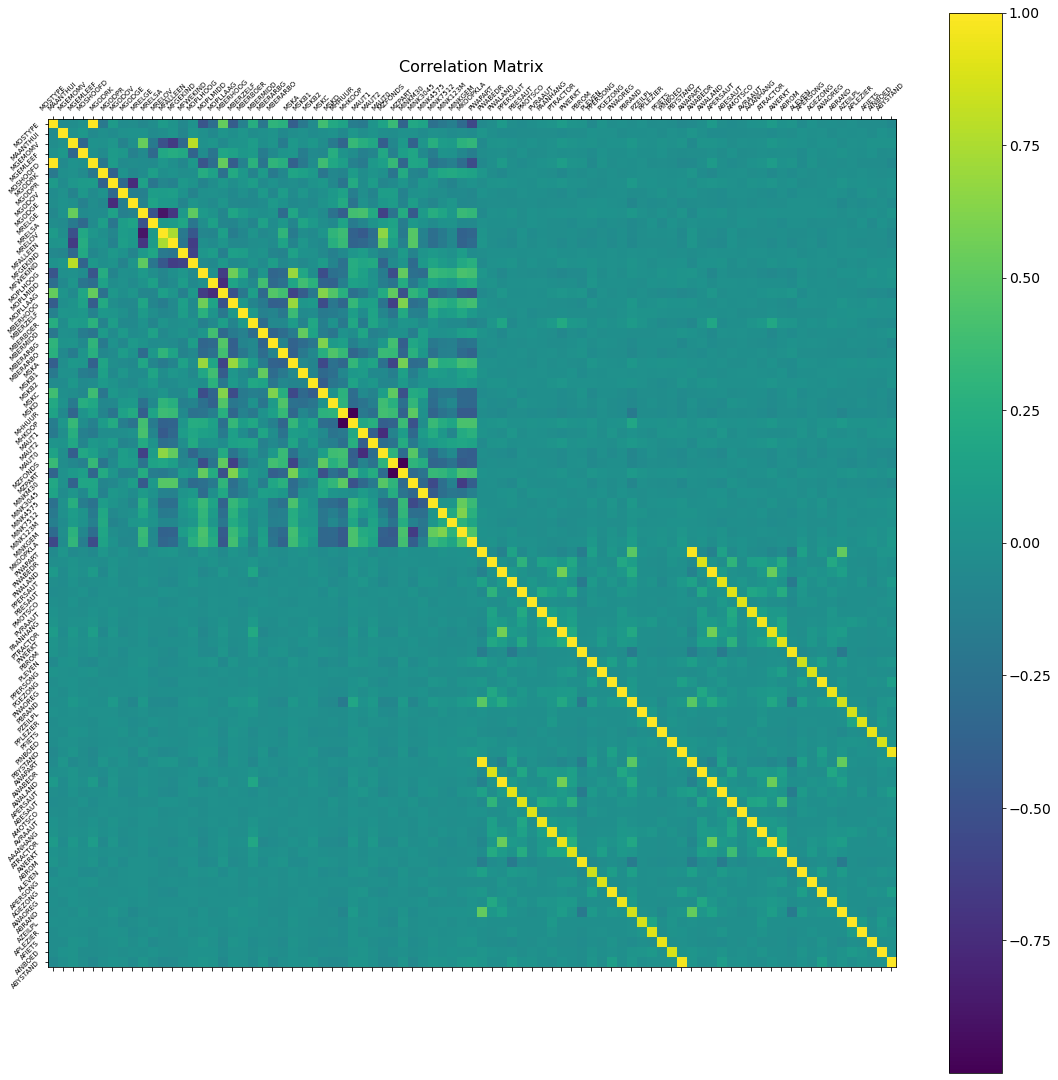

In [18]:
# Correlation Grid
f = plt.figure(figsize=(19, 19))
plt.matshow(df.corr(), fignum=f.number)
plt.yticks(range(col_list.shape[0]), col_list,  fontsize = 7, rotation=45)
plt.xticks(range(col_list.shape[0]), col_list,  fontsize = 7, rotation=45)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [19]:
# These 2 columns have categorical values
cat_col = ['MOSTYPE','MOSHOOFD']

#These columns have numerical values so they have to be rescaled
num_cols = X_df.columns.to_numpy()[43:]

def oneHotEncode(df, col_name):
    dummies = pd.get_dummies(df[col_name])
    df = pd.concat([df, dummies], axis = 1)
    df = df.drop([col_name], axis = 1)
    return df
    

#Transform categorical columns into One Hot Encoded Vectors
for col_name in cat_col:
    X_df = oneHotEncode(X_df, col_name)

In [20]:
# Scaling The numerical columns
scaler = StandardScaler()
X_df[num_cols] = scaler.fit_transform(X_df[num_cols])

In [21]:
def plotROCCurve(fpr, tpr, roc_auc_score):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    

In [22]:
y_test_combined = []
y_pred_combined = []

In [23]:
# A function that trains a logistic regression classifier, predicts on test set and returns roc auc score
def trainLogisticRegression(X_train, y_train, X_test, y_test, smote = True):
    if smote == True:
        X_train, y_train = SMOTE(random_state=rand_seed).fit_resample(X_train,y_train)
    clf = LogisticRegression(random_state=rand_seed, max_iter = 10000).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plotROCCurve(fpr, tpr, roc_auc_score(y_test, y_pred))

    y_test_combined.extend(list(y_test))
    y_pred_combined.extend(list(y_pred))
    return roc_auc_score(y_test, y_pred)

In [24]:
# A function that trains a linear regression classifier, predicts on test set and returns roc auc score
def trainLinearRegression(X_train, y_train, X_test, y_test, smote = True):
    if smote == True:
        X_train, y_train = SMOTE(random_state=rand_seed).fit_resample(X_train,y_train)
    clf = LinearRegression().fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred = np.clip(y_pred, 0, 1)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plotROCCurve(fpr, tpr, roc_auc_score(y_test, y_pred))

    y_test_combined.extend(list(y_test))
    y_pred_combined.extend(list(y_pred))
    return roc_auc_score(y_test, y_pred)

In [25]:
#10 fold cross validation 
def KFoldCrossValidation(X, y, n_splits = 10, regression = 'linear', smote = True):
    list_roc_auc_score = []
    global y_test_combined, y_pred_combined
    y_test_combined = []
    y_pred_combined = []
    kf = KFold(n_splits = n_splits, random_state = rand_seed, shuffle = True)
    for train_idx, test_idx in kf.split(X):
        X_train, y_train = X[train_idx], y[train_idx]
        X_test, y_test = X[test_idx], y[test_idx]
        if regression == 'logistic':
            list_roc_auc_score.append(trainLogisticRegression(X_train, y_train, X_test, y_test, smote))
        else:
            list_roc_auc_score.append(trainLinearRegression(X_train, y_train, X_test, y_test, smote))
    
    print("Max ROC AUC Score:", max(list_roc_auc_score))
    print("Mean ROC AUC Score: ", sum(list_roc_auc_score)/len(list_roc_auc_score))

# Original Dataset

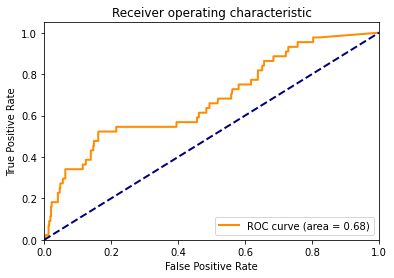

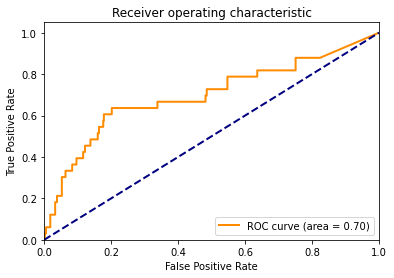

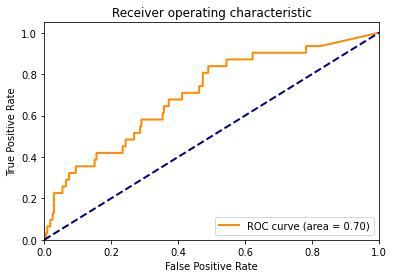

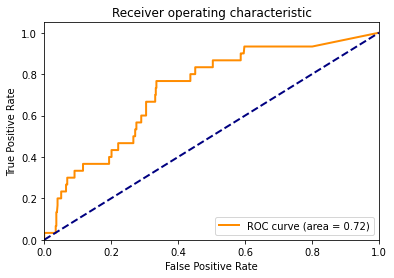

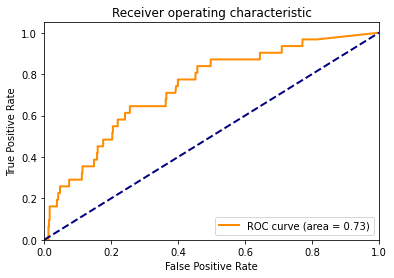

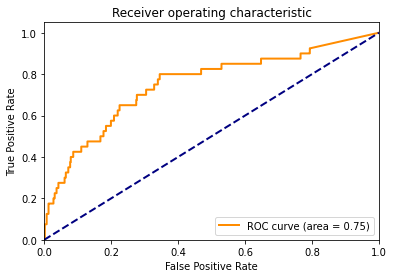

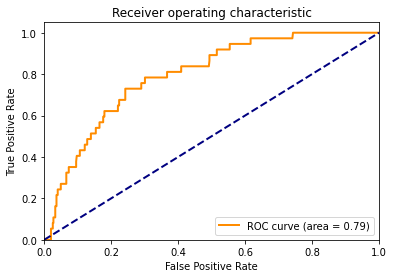

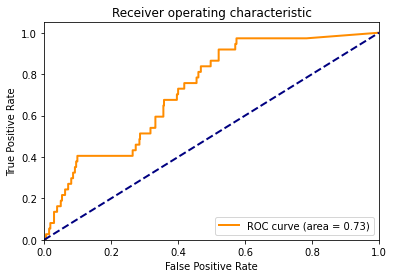

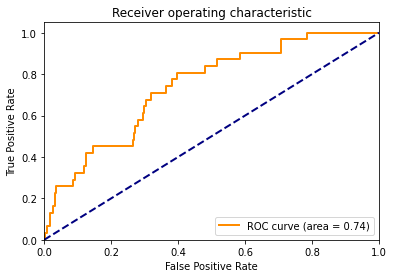

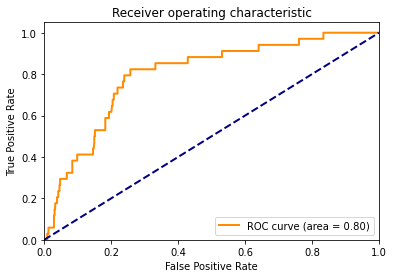

Max ROC AUC Score: 0.7971232288535852
Mean ROC AUC Score:  0.7342313739336519


In [26]:
KFoldCrossValidation(X_df.to_numpy(), y_df.to_numpy()[:, 0], regression = 'linear', smote = False)

<AxesSubplot:>

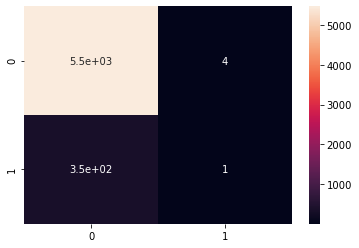

In [27]:
sns.heatmap(confusion_matrix(y_test_combined, np.array(y_pred_combined)>0.5), annot = True)

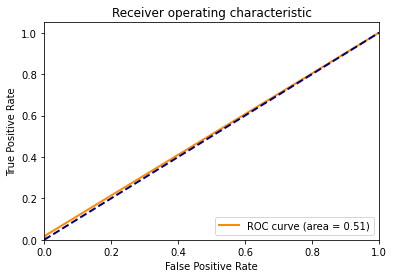

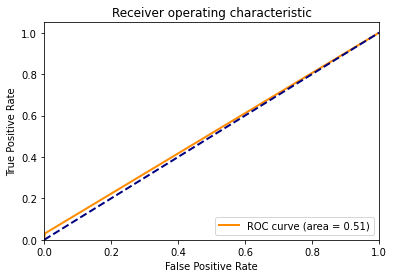

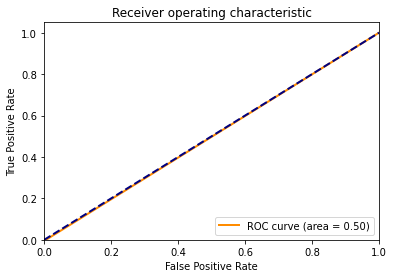

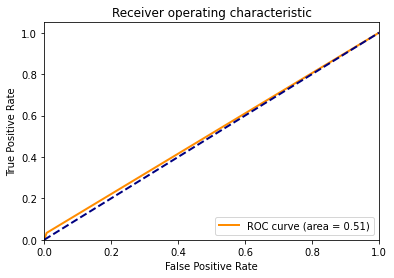

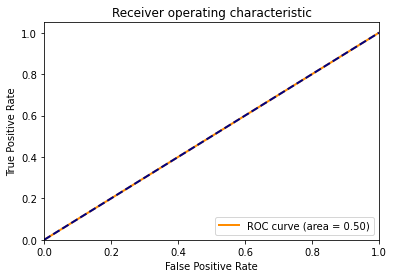

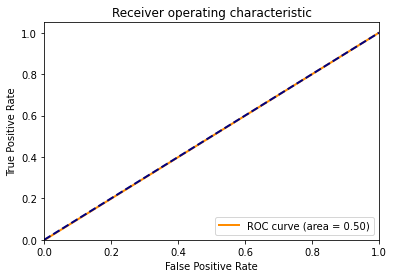

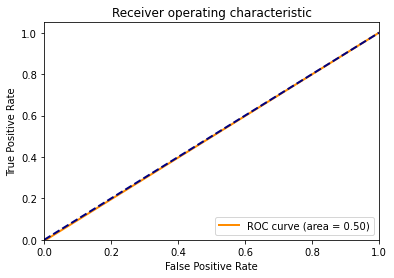

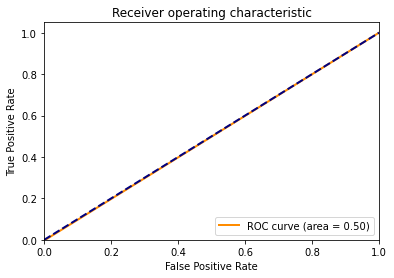

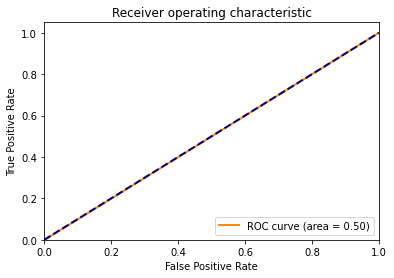

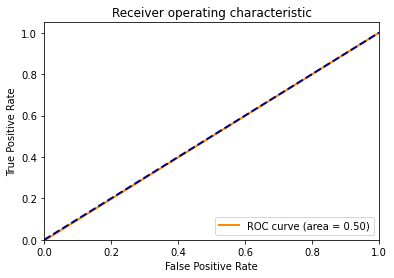

Max ROC AUC Score: 0.5142424242424242
Mean ROC AUC Score:  0.5024902360740591


In [28]:
KFoldCrossValidation(X_df.to_numpy(), y_df.to_numpy()[:, 0], regression = 'logistic', smote = False)

<AxesSubplot:>

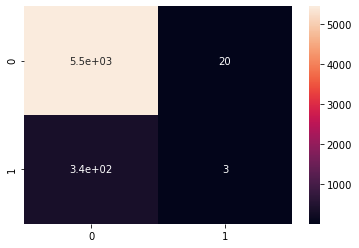

In [29]:
sns.heatmap(confusion_matrix(y_test_combined, np.array(y_pred_combined)>0.5), annot = True)

# Oversampled Dataset(SMOTE)

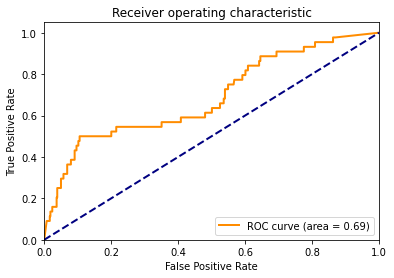

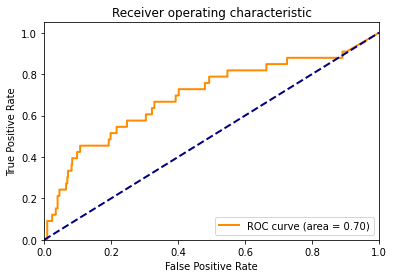

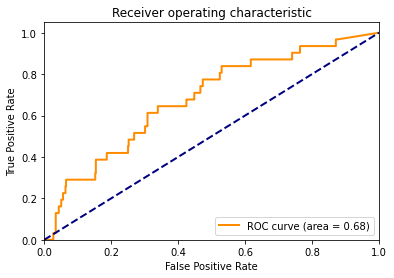

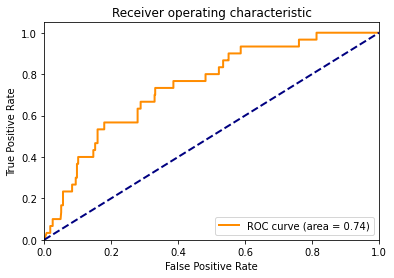

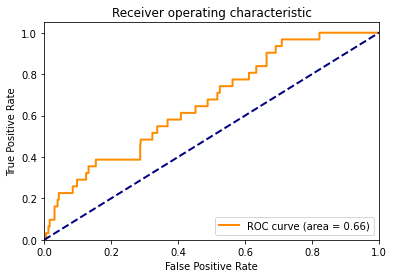

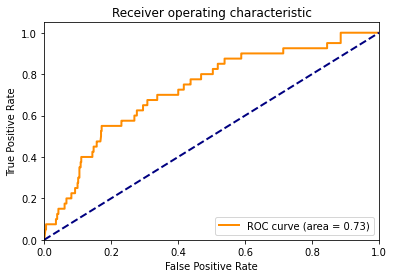

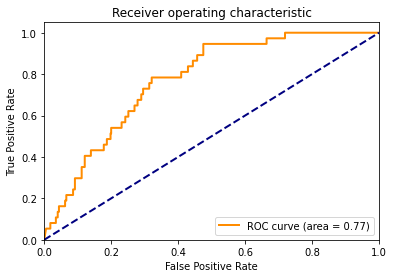

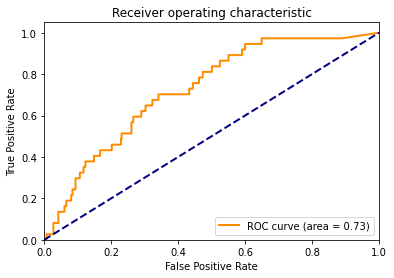

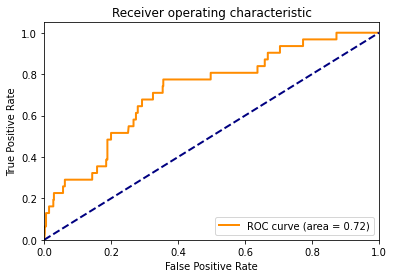

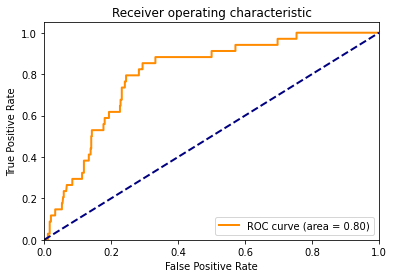

Max ROC AUC Score: 0.7986796908544439
Mean ROC AUC Score:  0.721615281408055


In [30]:
KFoldCrossValidation(X_df.to_numpy(), y_df.to_numpy(), regression = 'linear', smote = True)

<AxesSubplot:>

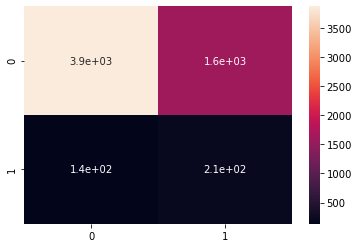

In [31]:
sns.heatmap(confusion_matrix(y_test_combined, np.array(y_pred_combined)>0.5), annot = True)

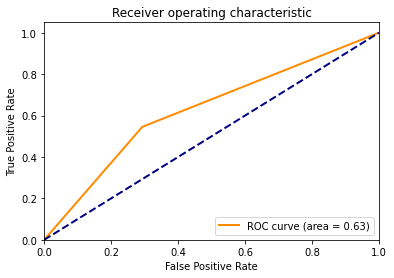

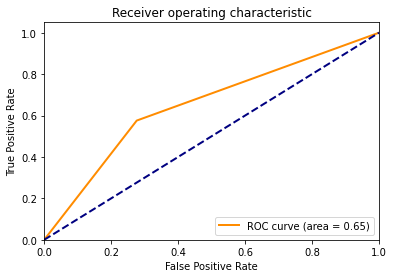

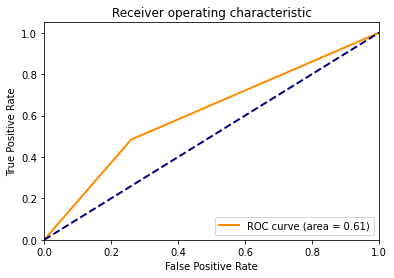

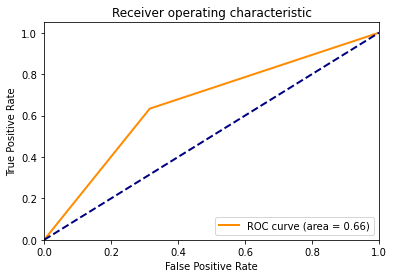

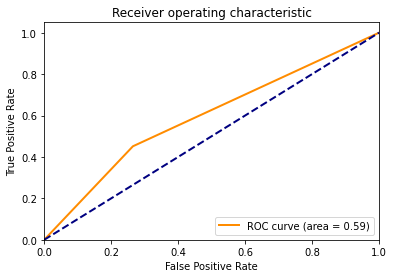

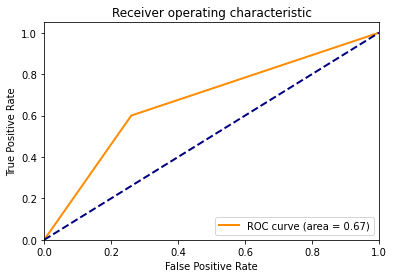

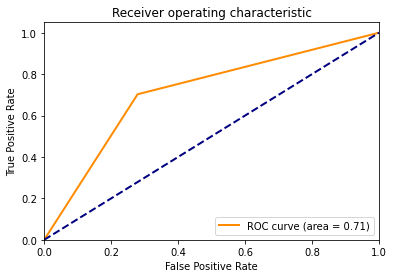

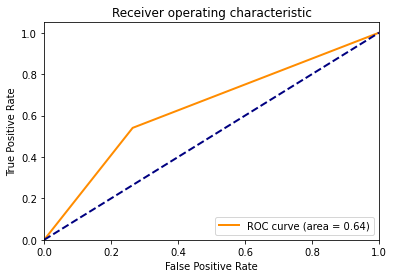

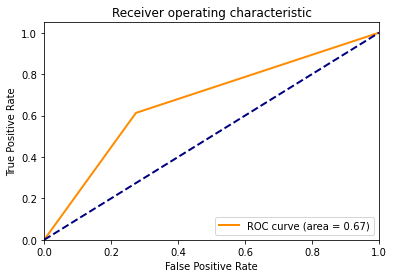

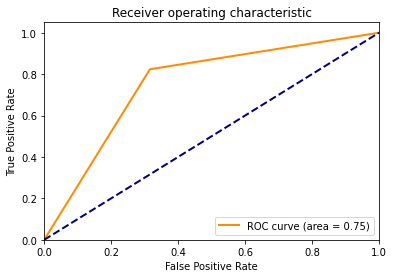

Max ROC AUC Score: 0.7539179905538858
Mean ROC AUC Score:  0.6583740175052587


In [32]:
KFoldCrossValidation(X_df.to_numpy(), y_df.to_numpy(), regression = 'logistic', smote = True)

<AxesSubplot:>

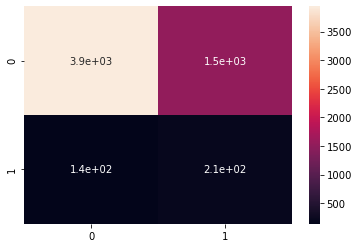

In [33]:
sns.heatmap(confusion_matrix(y_test_combined, np.array(y_pred_combined)>0.5), annot = True)

# Dimensionality Reduction

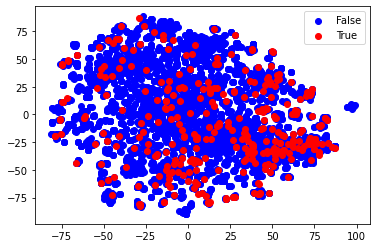

In [34]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
X = X_df.to_numpy()
y = y_df.to_numpy()[:, 0]
X = TSNE(n_components =2, random_state = rand_seed).fit_transform(X)
cdict = {1: 'red', 0: 'blue'}
for g in np.unique(y):
    idx = np.where(y == g)
    plt.scatter(X[idx, 0], X[idx, 1], c = cdict[g], label = np.bool(g))
plt.legend()
plt.show()

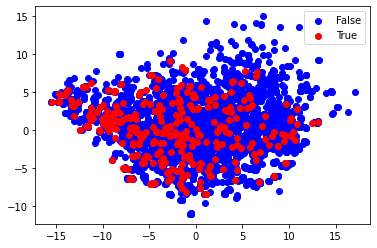

In [35]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
X = X_df.to_numpy()
y = y_df.to_numpy()[:, 0]
pca = PCA(random_state=rand_seed)
X = pca.fit_transform(X)
cdict = {1: 'red', 0: 'blue'}
for g in np.unique(y):
    idx = np.where(y == g)
    plt.scatter(X[idx, 0], X[idx, 1], c = cdict[g], label = np.bool(g))
plt.legend()
plt.show()

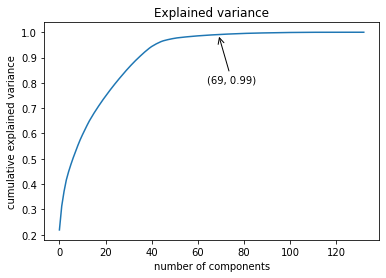

In [36]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.annotate('(69, 0.99)', xy=(69, 0.99), xytext=(64,0.8), fontsize='medium',arrowprops={'arrowstyle':'->','mutation_scale':15})
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Explained variance')
plt.show()